In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("archive (7).zip", low_memory=False, compression="zip")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           18938 non-null  object 
 2   balconies           9574 non-null   float64
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              9569 non-null   object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

In [4]:
Columns_drop  = ["combineDescription","completeStreetName","facingDesc", "id", "locality", "active", 
                 "localityId", "ownerName","parkingDesc", "propertyTitle","propertyType", "reactivationSource","shortUrl","weight","active","loanAvailable", "sharedAccomodation" ]

In [5]:
dataset = dataset.drop(columns=Columns_drop)

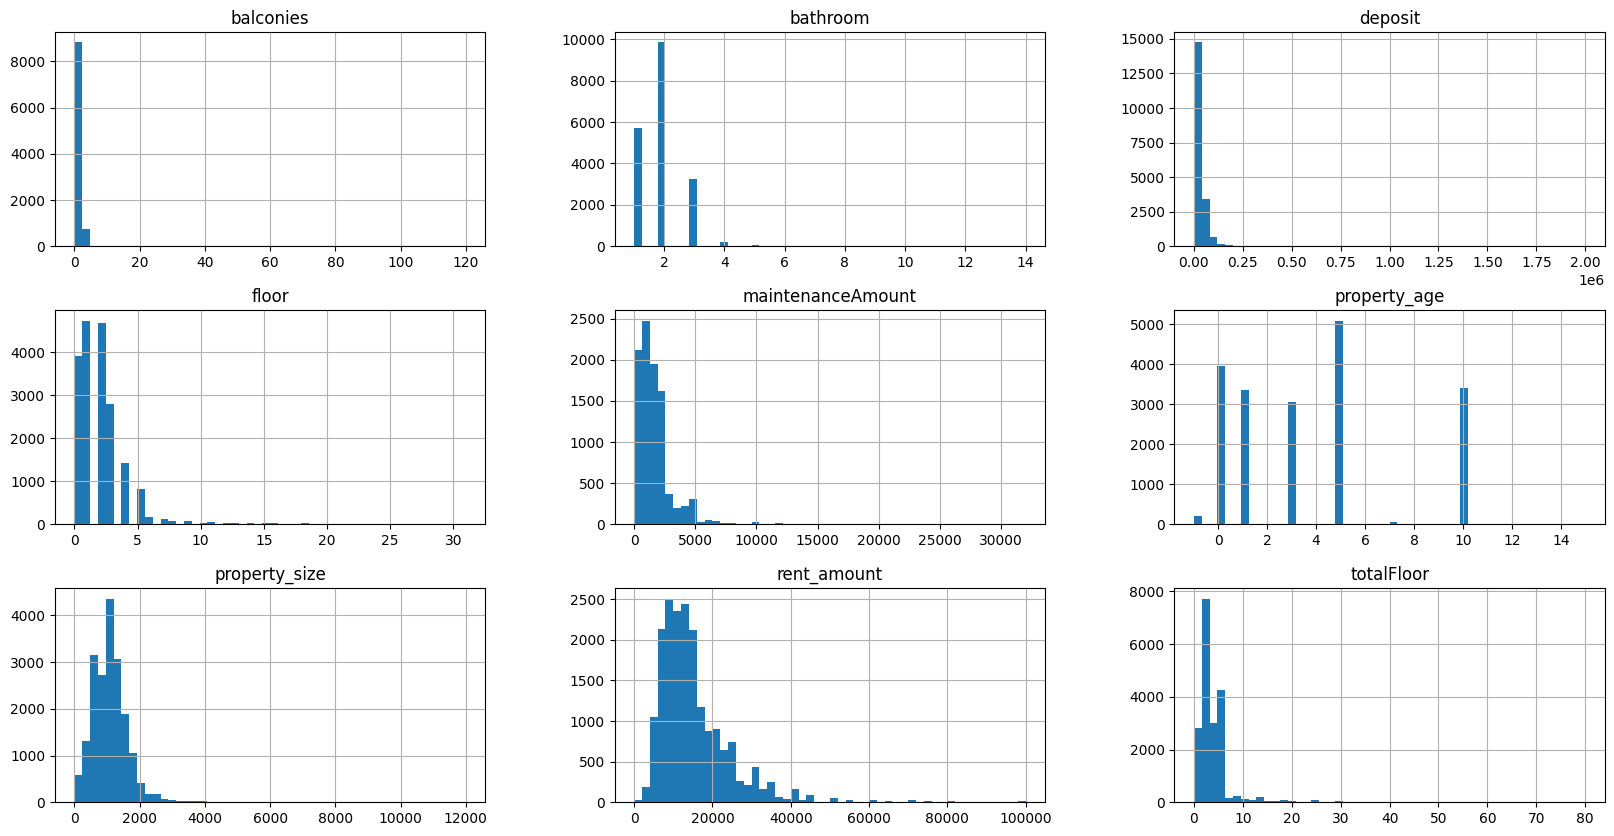

In [6]:
import matplotlib.pyplot as plt
dataset.hist(bins=50,figsize=(20,10))
plt.show()

In [7]:
dataset["rent_amount"].value_counts().sort_index()

rent_amount
0         12
1          4
4          1
12         1
13         1
          ..
88000      1
90000      5
95000      2
99999      1
100000    13
Name: count, Length: 224, dtype: int64

In [8]:
def maintenance(data):
    if data>50:
        return data
    else:
        return 0

def propertyAge(data):
    if data > 0:
        return data
    else:
        return 0
def rentAmount(data):
    if data > 1000:
        return data
    else:
        return 0

def Latitude_longitude (coordinates):
    latitude, longitude = coordinates.split(",")
    return latitude, longitude
    
    

In [9]:
dataset["latitude"], dataset["longitude"]= zip(*dataset["location"].apply(Latitude_longitude))
dataset["maintenanceAmount"] = dataset["maintenanceAmount"].apply(maintenance)
dataset["property_age"]= dataset["property_age"].apply(propertyAge)
dataset["rent_amount"]= dataset["rent_amount"].apply(rentAmount)

In [10]:
dataset["rent_amount"].value_counts().sort_index()

rent_amount
0         23
1100       1
1200       2
1600       1
1800       2
          ..
88000      1
90000      5
95000      2
99999      1
100000    13
Name: count, Length: 217, dtype: int64

In [11]:
dataset.describe()

,balconies,bathroom,deposit,floor,maintenanceAmount,property_age,property_size,rent_amount,totalFloor
count,9574.000000,19110.000000,1.911000e+04,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000
mean,1.482035,1.911826,3.337933e+04,2.109158,809.912716,3.792465,1067.674411,14919.585767,3.907902
std,2.133887,0.764841,4.101519e+04,2.424864,1345.371911,3.448878,549.019152,9623.748312,3.899450
min,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.600000e+04,1.000000,0.000000,1.000000,700.000000,8999.000000,2.000000
50%,1.000000,2.000000,2.500000e+04,2.000000,0.000000,3.000000,1000.000000,12500.000000,3.000000
75%,2.000000,2.000000,4.000000e+04,3.000000,1300.000000,5.000000,1334.000000,18000.000000,5.000000
max,120.000000,14.000000,2.000000e+06,31.000000,32000.000000,15.000000,12000.000000,100000.000000,80.000000


In [12]:
indices_to_drop = dataset[dataset["rent_amount"] == 0].index
dataset.drop(indices_to_drop, inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19087 entries, 0 to 19109
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amenities          18916 non-null  object 
 1   balconies          9554 non-null   float64
 2   bathroom           19087 non-null  int64  
 3   deposit            19087 non-null  int64  
 4   facing             9549 non-null   object 
 5   floor              19087 non-null  int64  
 6   furnishingDesc     19087 non-null  object 
 7   gym                19087 non-null  bool   
 8   isMaintenance      19087 non-null  bool   
 9   lift               19087 non-null  bool   
 10  location           19087 non-null  object 
 11  maintenanceAmount  19087 non-null  float64
 12  parking            19087 non-null  object 
 13  property_age       19087 non-null  int64  
 14  property_size      19087 non-null  int64  
 15  rent_amount        19087 non-null  int64  
 16  swimmingPool       19087 no

In [14]:
corr_matrix=dataset[["balconies", "bathroom", "deposit", "floor", "maintenanceAmount", "property_age", "property_size", "rent_amount", "totalFloor"]].corr()
corr_matrix["rent_amount"].sort_values(ascending=False)

rent_amount          1.000000
deposit              0.759245
property_size        0.741092
bathroom             0.687305
maintenanceAmount    0.582428
totalFloor           0.486672
floor                0.365403
balconies            0.120064
property_age        -0.058547
Name: rent_amount, dtype: float64

In [15]:
dataset["rent_category"] = pd.cut(dataset["rent_amount"], bins=[0, 20000,40000, 60000, 80000, np.inf], labels = [1,2,3,4,5])

<Axes: xlabel='rent_category'>

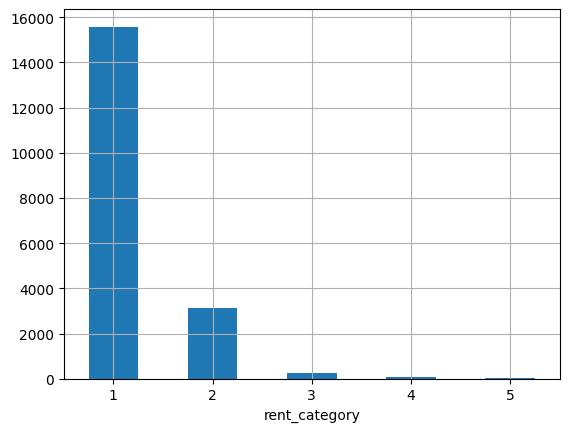

In [16]:
dataset["rent_category"].value_counts().sort_index().plot.bar(rot = 0, grid= True)

In [17]:
dataset["rent_category"].value_counts().sort_index()

rent_category
1    15582
2     3143
3      270
4       66
5       26
Name: count, dtype: int64

In [18]:
dataset = dataset.dropna(subset=["rent_category"])
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    dataset, 
    test_size=0.2, 
    stratify=dataset["rent_category"], 
    random_state=42
)

In [19]:
corr_matrix=dataset[["balconies", "bathroom", "deposit", "floor", "maintenanceAmount", "property_age", "property_size", "rent_amount", "totalFloor"]].corr()
corr_matrix["rent_amount"].sort_values(ascending=False)

rent_amount          1.000000
deposit              0.759245
property_size        0.741092
bathroom             0.687305
maintenanceAmount    0.582428
totalFloor           0.486672
floor                0.365403
balconies            0.120064
property_age        -0.058547
Name: rent_amount, dtype: float64

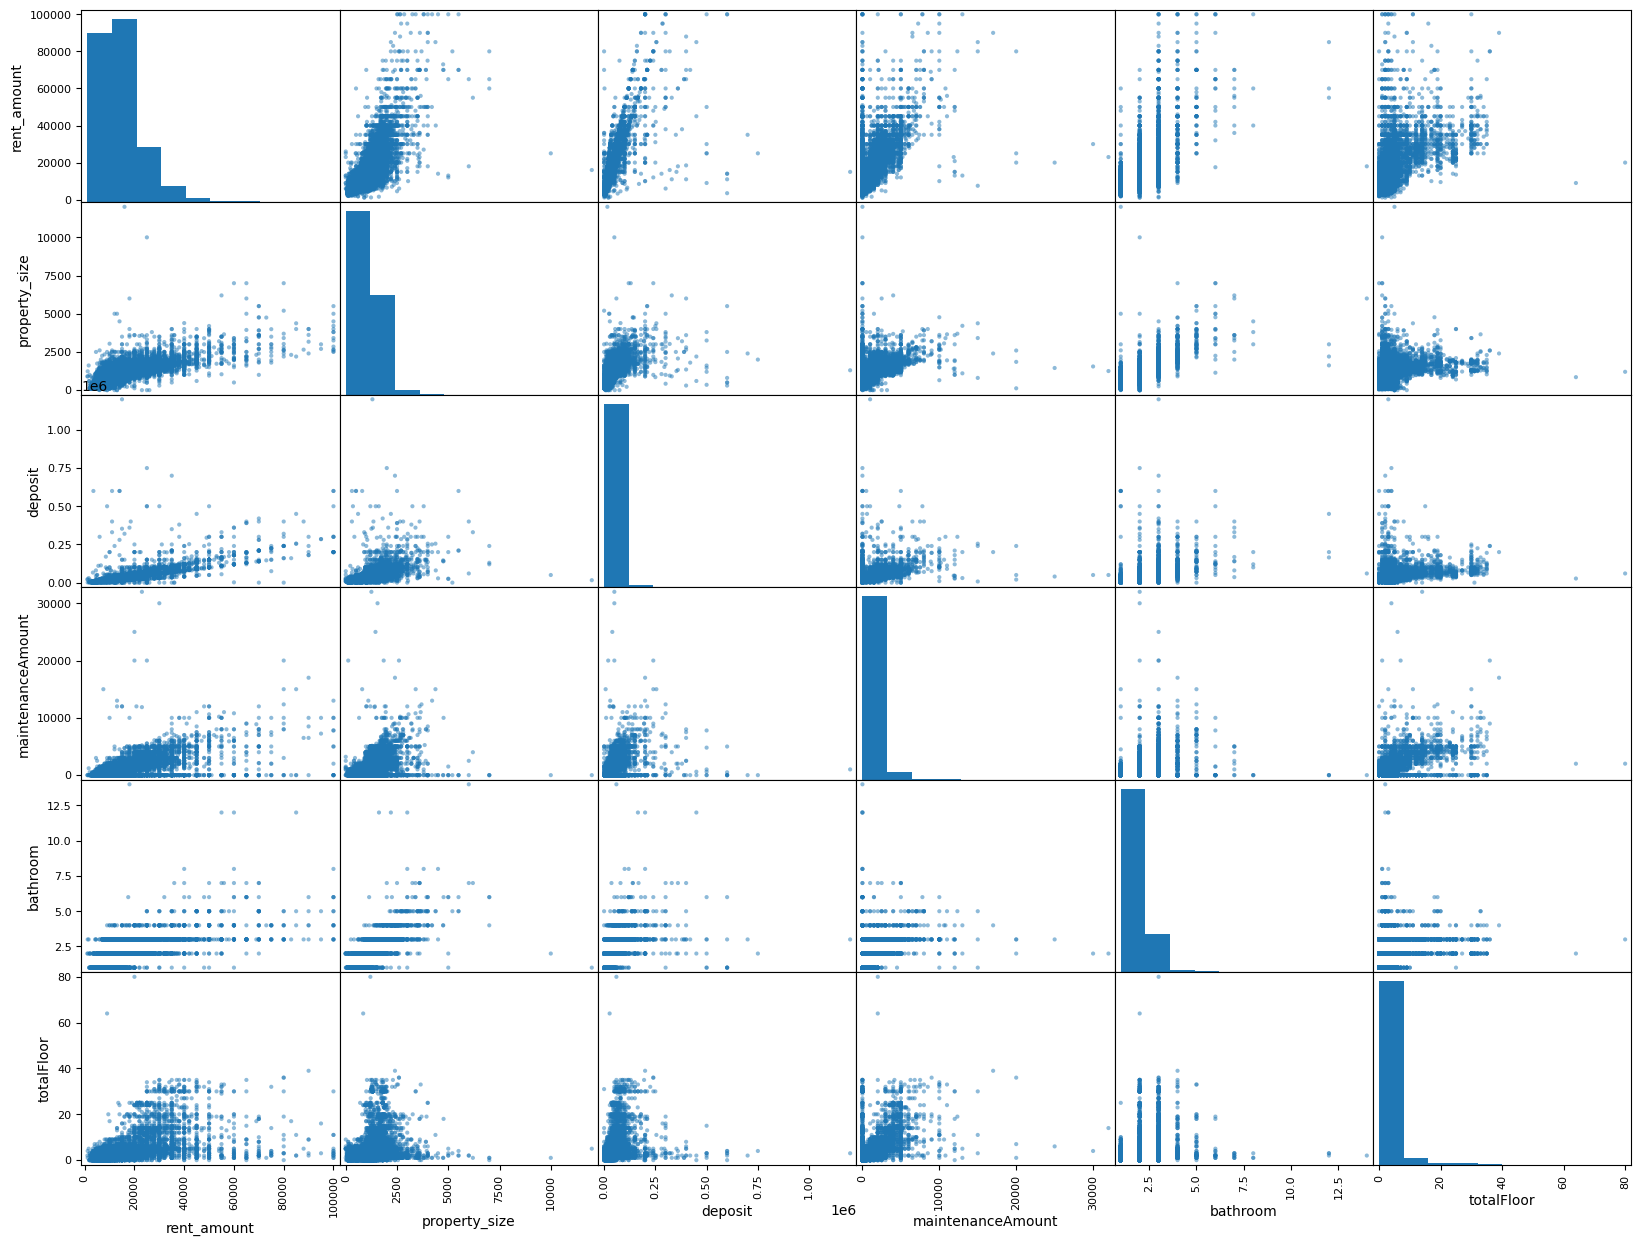

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["rent_amount", "property_size", "deposit", "maintenanceAmount", "bathroom", "totalFloor" ]
scatter_matrix(dataset[attributes], figsize=(20,15) )
plt.show()

In [21]:
dataset_train_X = strat_train_set.drop("rent_amount", axis = 1)
dataset_train_y = strat_train_set["rent_amount"].copy()

In [22]:
cols_has_NaN = ["balconies","maintenanceAmount","facing", "waterSupply"]
for i in cols_has_NaN:
    print(dataset[i].value_counts().sort_index())
    print("*******************************************************************************************************")


balconies
0.0       770
1.0      4608
2.0      3426
3.0       652
4.0        83
5.0        10
6.0         1
12.0        1
110.0       2
120.0       1
Name: count, dtype: int64
*******************************************************************************************************
maintenanceAmount
0.0        9792
60.0          1
80.0          1
100.0        73
115.0         1
           ... 
17000.0       1
20000.0       3
25000.0       1
30000.0       1
32000.0       1
Name: count, Length: 258, dtype: int64
*******************************************************************************************************
facing
DK     234
E     4477
N     1725
NE     719
NW      78
S      317
SE     102
SW      32
W     1865
Name: count, dtype: int64
*******************************************************************************************************
waterSupply
BOREWELL       1329
CORPORATION    1582
CORP_BORE      6956
Name: count, dtype: int64
*************************************************

In [23]:
dataset_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15269 entries, 1623 to 7413
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   amenities          15125 non-null  object  
 1   balconies          7661 non-null   float64 
 2   bathroom           15269 non-null  int64   
 3   deposit            15269 non-null  int64   
 4   facing             7665 non-null   object  
 5   floor              15269 non-null  int64   
 6   furnishingDesc     15269 non-null  object  
 7   gym                15269 non-null  bool    
 8   isMaintenance      15269 non-null  bool    
 9   lift               15269 non-null  bool    
 10  location           15269 non-null  object  
 11  maintenanceAmount  15269 non-null  float64 
 12  parking            15269 non-null  object  
 13  property_age       15269 non-null  int64   
 14  property_size      15269 non-null  int64   
 15  swimmingPool       15269 non-null  bool    
 16  totalFl

In [24]:
dataset_train_X["balconies"]=dataset_train_X["balconies"].fillna(0.0)
dataset_train_X["maintenanceAmount"] = dataset_train_X["maintenanceAmount"].fillna(0.0)
dataset_train_X["facing"] = dataset_train_X["facing"].fillna("DK")
dataset_train_X["waterSupply"]=dataset_train_X["waterSupply"].fillna("N/A")

In [25]:
import json
def parse_json(x):
    if isinstance(x, str):
        return json.loads(x)
    return {}
amenities_dict = dataset_train_X['amenities'].apply(parse_json)
amenities_df = pd.json_normalize(amenities_dict)
amenities_df = amenities_df.drop(columns=["LIFT", "GYM"], axis=1)
dataset_train_X = dataset_train_X.drop(columns=["amenities"])
dataset_train_X = dataset_train_X.join(amenities_df)


In [26]:
Replace_False = ["INTERCOM", "AC", "RWH", "HK", "INTERNET", "CLUB", "GP", "FS", "STP", "PARK", "SC", "PB", "CPA", "SECURITY", "POOL", "VP", "SERVANT" ]

In [27]:
dataset_train_X[Replace_False].fillna(False, inplace=True)

C:\Users\manas\AppData\Local\Temp\ipykernel_28260\2310772000.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_train_X[Replace_False].fillna(False, inplace=True)
C:\Users\manas\AppData\Local\Temp\ipykernel_28260\2310772000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train_X[Replace_False].fillna(False, inplace=True)


In [28]:
dataset_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15269 entries, 1623 to 7413
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   balconies          15269 non-null  float64 
 1   bathroom           15269 non-null  int64   
 2   deposit            15269 non-null  int64   
 3   facing             15269 non-null  object  
 4   floor              15269 non-null  int64   
 5   furnishingDesc     15269 non-null  object  
 6   gym                15269 non-null  bool    
 7   isMaintenance      15269 non-null  bool    
 8   lift               15269 non-null  bool    
 9   location           15269 non-null  object  
 10  maintenanceAmount  15269 non-null  float64 
 11  parking            15269 non-null  object  
 12  property_age       15269 non-null  int64   
 13  property_size      15269 non-null  int64   
 14  swimmingPool       15269 non-null  bool    
 15  totalFloor         15269 non-null  int64   
 16  type_bh

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
facing_encoder = OneHotEncoder(sparse_output=False)
furnishing_encoder = OneHotEncoder(sparse_output=False)
parking_encoder  =  OneHotEncoder(sparse_output=False)
water_encoder =  OneHotEncoder(sparse_output=False)

In [31]:
facing_cat=dataset_train_X[["facing"]]
facing_encoded = facing_encoder.fit_transform(facing_cat)
facing_output = pd.DataFrame(facing_encoder.transform(facing_cat), columns=facing_encoder.get_feature_names_out(), index = facing_cat.index)
facing_output

,facing_DK,facing_E,facing_N,facing_NE,facing_NW,facing_S,facing_SE,facing_SW,facing_W
1623,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
furnishing_cat=dataset_train_X[["furnishingDesc"]]
furnishing_output = pd.DataFrame(furnishing_encoder.fit_transform(furnishing_cat), columns=furnishing_encoder.get_feature_names_out(), index = furnishing_cat.index)
furnishing_output

,furnishingDesc_Full,furnishingDesc_Semi,furnishingDesc_Unfurnished
1623,0.0,1.0,0.0
11172,0.0,0.0,1.0
4815,0.0,1.0,0.0
5187,0.0,0.0,1.0
10247,0.0,0.0,1.0
...,...,...,...
2994,1.0,0.0,0.0
18630,0.0,0.0,1.0
4159,0.0,1.0,0.0
4624,0.0,0.0,1.0


In [33]:
parking_cat=dataset_train_X[["parking"]]
parking_output = pd.DataFrame(parking_encoder.fit_transform(parking_cat), columns=parking_encoder.get_feature_names_out(), index = parking_cat.index)
parking_output

,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER
1623,0.0,0.0,0.0,1.0
11172,0.0,1.0,0.0,0.0
4815,0.0,0.0,0.0,1.0
5187,0.0,0.0,0.0,1.0
10247,1.0,0.0,0.0,0.0
...,...,...,...,...
2994,1.0,0.0,0.0,0.0
18630,0.0,0.0,0.0,1.0
4159,1.0,0.0,0.0,0.0
4624,1.0,0.0,0.0,0.0


In [34]:
water_cat=dataset_train_X[["waterSupply"]]
water_output = pd.DataFrame(water_encoder.fit_transform(water_cat), columns=water_encoder.get_feature_names_out(), index = water_cat.index)
water_output

,waterSupply_BOREWELL,waterSupply_CORPORATION,waterSupply_CORP_BORE,waterSupply_N/A
1623,0.0,0.0,1.0,0.0
11172,0.0,0.0,0.0,1.0
4815,0.0,0.0,0.0,1.0
5187,0.0,1.0,0.0,0.0
10247,1.0,0.0,0.0,0.0
...,...,...,...,...
2994,0.0,0.0,1.0,0.0
18630,1.0,0.0,0.0,0.0
4159,0.0,0.0,1.0,0.0
4624,1.0,0.0,0.0,0.0
